## Genome-wide view of DNA oxidation

<div style="text-align: right">
    05.07.2024
    <br>
    Vakil Takhaveev, PhD
</div>

In [1]:
#importing necessary modules
import os
os.environ['LC_ALL'] = 'en_US.UTF-8'
os.environ['LANG'] = 'en_US.UTF-8'
#os.environ["MPLBACKEND"] = "TkAgg"

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sys
print(sys.version)

3.11.6 (main, Jun  7 2024, 07:09:59) [GCC 13.2.0]


In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['mathtext.default'] = "regular"

matplotlib.rcParams['font.size'] = 16

In [3]:
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("matplotlib", matplotlib.__version__)
print("seaborn", sns.__version__)
print("scipy", scipy.__version__)

numpy 1.26.4
pandas 2.2.2
matplotlib 3.9.0
seaborn 0.13.2
scipy 1.13.1


In [4]:
chromosomes = ['chr' + str(i) for i in np.arange(1, 23, 1)] + ['chrX']
chromosomes

['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr20',
 'chr21',
 'chr22',
 'chrX']

In [5]:
chr_sizesGRCh38 = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/genomes/GRCh38_NCBI_Bowtie2_index/GRCh38_noalt_as.fasta.fai"
DF_chrsizes = pd.read_csv(chr_sizesGRCh38, sep = "\t", header = None)
print("Number of chromsomes/contigs in the genome assembly:", DF_chrsizes[0].nunique())
DF_chrsizes = DF_chrsizes[DF_chrsizes[0].isin(chromosomes)]
print("Number of chromsomes/contigs in the genome assembly:", DF_chrsizes[0].nunique())


Number of chromsomes/contigs in the genome assembly: 195
Number of chromsomes/contigs in the genome assembly: 23


In [6]:
DF_chrsizes

0          1           2   3   4
0    chr1  248956422         112  60  61
1    chr2  242193529   253105920  60  61
2    chr3  198295559   499336120  60  61
3    chr4  190214555   700936717  60  61
4    chr5  181538259   894321649  60  61
5    chr6  170805979  1078885658  60  61
6    chr7  159345973  1252538516  60  61
7    chr8  145138636  1414540368  60  61
8    chr9  138394717  1562098094  60  61
9   chr10  133797422  1702799503  60  61
10  chr11  135086622  1838826996  60  61
11  chr12  133275309  1976165175  60  61
12  chr13  114364328  2111661853  60  61
13  chr14  107043718  2227932380  60  61
14  chr15  101991189  2336760273  60  61
15  chr16   90338345  2440451428  60  61
16  chr17   83257441  2532295525  60  61
17  chr18   80373285  2616940703  60  61
18  chr19   58617616  2698653668  60  61
19  chr20   64444167  2758248357  60  61
20  chr21   46709983  2823766719  60  61
21  chr22   50818468  2871255327  60  61
22   chrX  156040895  2922920882  60  61

In [7]:
PATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_Dec2021/Binning_normalization_MS/"
DF_Gs = pd.read_csv(PATH + "Genome_bins_100000.G_counts.csv", index_col = 0)
DF_Gs = DF_Gs.rename(columns={"0" : "Chromosome", "3" : "Bin"})
DF_Gs

Chromosome        Bin  G_count
0           chr1          0    38207
1           chr1     100000    45816
2           chr1     200000    19459
3           chr1     300000    24554
4           chr1     400000    40191
...          ...        ...      ...
30316       chrX  155600000    36760
30317       chrX  155700000    37397
30318       chrX  155800000    38624
30319       chrX  155900000    41066
30320       chrX  156000000    17057

[30321 rows x 3 columns]

In [8]:
DF_Gs[DF_Gs["G_count"] == 0]

Chromosome        Bin  G_count
1252        chr1  125200000        0
1253        chr1  125300000        0
1254        chr1  125400000        0
1255        chr1  125500000        0
1256        chr1  125600000        0
...          ...        ...      ...
28400      chr22   14900000        0
28401      chr22   15000000        0
28780       chrX    2000000        0
29131       chrX   37100000        0
29254       chrX   49400000        0

[1189 rows x 3 columns]

In [9]:
DF_Gs[DF_Gs["G_count"] > 0].shape[0]

29132

In [10]:
PATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_Dec2021/Binning_normalization_MS/"
BINSIZE = float(10**5)
DF_damage_binned = pd.read_csv(PATH + "Binned_damage_GENOMEWIDE" + str(int(BINSIZE)) + "_CCS.v3.MS.csv", index_col = 0)
print(DF_damage_binned.shape[0], DF_damage_binned.shape[0]/6)

DF_damage_binned = pd.merge(DF_damage_binned, DF_Gs[DF_Gs["G_count"] > 0], on = ("Chromosome", "Bin"), how = "inner")
print(DF_damage_binned.shape[0], DF_damage_binned.shape[0]/6)

DF_damage_binned.loc[:, "Damage"] = (10**3)*DF_damage_binned["Damage"]/DF_damage_binned["G_count"]
DF_damage_binned = DF_damage_binned.loc[:, ["Bin", "Damage", "Chromosome", "Sample"]]
DF_damage_binned

181926 30321.0
174792 29132.0


Bin     Damage Chromosome  \
0               0.0   0.026173       chr1   
1          100000.0   0.043653       chr1   
2          200000.0   0.154170       chr1   
3          300000.0   0.081453       chr1   
4          400000.0   0.024881       chr1   
...             ...        ...        ...   
174787  155600000.0  16.322089       chrX   
174788  155700000.0  16.819531       chrX   
174789  155800000.0  14.162179       chrX   
174790  155900000.0  13.539181       chrX   
174791  156000000.0  43.383948       chrX   

                                                   Sample  
0       20211208.B-o26936_1_09-CCS_3_HAP1_NegCtrl_R2_R...  
1       20211208.B-o26936_1_09-CCS_3_HAP1_NegCtrl_R2_R...  
2       20211208.B-o26936_1_09-CCS_3_HAP1_NegCtrl_R2_R...  
3       20211208.B-o26936_1_09-CCS_3_HAP1_NegCtrl_R2_R...  
4       20211208.B-o26936_1_09-CCS_3_HAP1_NegCtrl_R2_R...  
...                                                   ...  
174787  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  
174788  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  
174789  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  
174790  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  
174791  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  

[174792 rows x 4 columns]

In [11]:
DF_damage_binned["Sample"].unique()

array(['20211208.B-o26936_1_09-CCS_3_HAP1_NegCtrl_R2_R1.fastq.gz',
       '20211208.B-o26936_1_10-CCS_3_HAP1_NegCtrl_R3_R1.fastq.gz',
       '20211208.B-o26936_1_08-CCS_3_HAP1_NegCtrl_R1_R1.fastq.gz',
       '20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2_R1.fastq.gz',
       '20211208.B-o26936_1_05-CCS_3_HAP1_Untreated_R1_R1.fastq.gz',
       '20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3_R1.fastq.gz'],
      dtype=object)

In [12]:
tempDF = DF_damage_binned.loc[:, ["Chromosome", "Bin"]].copy().drop_duplicates()
tempDF

Chromosome          Bin
0           chr1          0.0
1           chr1     100000.0
2           chr1     200000.0
3           chr1     300000.0
4           chr1     400000.0
...          ...          ...
29127       chrX  155600000.0
29128       chrX  155700000.0
29129       chrX  155800000.0
29130       chrX  155900000.0
29131       chrX  156000000.0

[29132 rows x 2 columns]

In [13]:
cenSatRegions = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/genome_annotation/general_human_annotation/Centromeres_GRCh38.hg38.UCSCTableBrowser_downl31.01.2023.csv"
gaps = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/genome_annotation/general_human_annotation/Gaps_GRCh38.hg38.downl01.02.2023.csv"

df_centromere = pd.read_csv(cenSatRegions, header = 0, sep = '\t')
df_centromere = df_centromere[df_centromere["chrom"].isin(chromosomes)]

for row_i, row in df_centromere.iterrows():
    chrom = row["chrom"]
    st = float(row["chromStart"])
    end = float(row["chromEnd"])
        
    tempDF = tempDF[~((tempDF["Chromosome"] == chrom) & (tempDF["Bin"] >= st) & (tempDF["Bin"] <= end))].copy()
    tempDF = tempDF[~((tempDF["Chromosome"] == chrom) & (tempDF["Bin"] + BINSIZE >= st) & (tempDF["Bin"] + BINSIZE <= end))].copy()

df_gaps = pd.read_csv(gaps, header = 0, sep = "\t")
df_gaps = df_gaps[df_gaps["chrom"].isin(chromosomes)]
df_gaps = df_gaps[df_gaps["type"].isin(['heterochromatin', 'short_arm'])]

for row_i, row in df_gaps.iterrows():
    chrom = row["chrom"]
    st = float(row["chromStart"])
    end = float(row["chromEnd"])
        
    tempDF = tempDF[~((tempDF["Chromosome"] == chrom) & (tempDF["Bin"] >= st) & (tempDF["Bin"] <= end))].copy()
    tempDF = tempDF[~((tempDF["Chromosome"] == chrom) & (tempDF["Bin"] + BINSIZE >= st) & (tempDF["Bin"] + BINSIZE <= end))].copy()
    
tempDF

Chromosome          Bin
0           chr1          0.0
1           chr1     100000.0
2           chr1     200000.0
3           chr1     300000.0
4           chr1     400000.0
...          ...          ...
29127       chrX  155600000.0
29128       chrX  155700000.0
29129       chrX  155800000.0
29130       chrX  155900000.0
29131       chrX  156000000.0

[28601 rows x 2 columns]

In [14]:
tempDF = pd.merge(tempDF, DF_Gs.loc[DF_Gs["G_count"] > 0, ["Chromosome", "Bin"]], on = ("Chromosome", "Bin"), how = "inner")
tempDF

Chromosome          Bin
0           chr1          0.0
1           chr1     100000.0
2           chr1     200000.0
3           chr1     300000.0
4           chr1     400000.0
...          ...          ...
28596       chrX  155600000.0
28597       chrX  155700000.0
28598       chrX  155800000.0
28599       chrX  155900000.0
28600       chrX  156000000.0

[28601 rows x 2 columns]

In [15]:
DF = pd.merge(DF_damage_binned, tempDF, on = ["Chromosome", "Bin"])
#
DF = DF[DF["Sample"].isin(['20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2_R1.fastq.gz',
       '20211208.B-o26936_1_05-CCS_3_HAP1_Untreated_R1_R1.fastq.gz',
       '20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3_R1.fastq.gz'])]
#
DF = DF.reset_index(drop = True)
DF

Bin     Damage Chromosome  \
0              0.0  19.603738       chr1   
1         100000.0  17.635760       chr1   
2         200000.0  21.994964       chr1   
3         300000.0  13.643398       chr1   
4         400000.0  15.849319       chr1   
...            ...        ...        ...   
85798  155600000.0  16.322089       chrX   
85799  155700000.0  16.819531       chrX   
85800  155800000.0  14.162179       chrX   
85801  155900000.0  13.539181       chrX   
85802  156000000.0  43.383948       chrX   

                                                  Sample  
0      20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2...  
1      20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2...  
2      20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2...  
3      20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2...  
4      20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2...  
...                                                  ...  
85798  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  
85799  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  
85800  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  
85801  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  
85802  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  

[85803 rows x 4 columns]

In [16]:
DF.shape[0]/3

28601.0

In [17]:
DF_mean_norm = pd.read_csv("/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_Dec2021/NORM_medians_prot_coding_not_expresed_HAP1.CCS.v3_MS.csv",
                          index_col = 0)
DF_file_sample = pd.read_csv("../../File_Sample_table_CCSv3_Dec.csv")
DF_file_sample = DF_file_sample.reset_index(drop = True)

DF_mean_norm2 = pd.merge(DF_mean_norm, DF_file_sample, on = "Sample")
DF_mean_norm2 = DF_mean_norm2.loc[:, ["File", "Median"]]
DF_mean_norm2 = DF_mean_norm2.rename(columns = {"File" : "Sample"})
DF_mean_norm2

Sample     Median
0  20211208.B-o26936_1_05-CCS_3_HAP1_Untreated_R1...  14.228302
1  20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2...  14.925373
2  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  14.256619

In [18]:
DF = pd.merge(DF, DF_mean_norm2, on = "Sample", how = "left")
DF.loc[:, "Damage"] = DF["Damage"]/DF["Median"]
DF

Bin    Damage Chromosome  \
0              0.0  1.313450       chr1   
1         100000.0  1.181596       chr1   
2         200000.0  1.473663       chr1   
3         300000.0  0.914108       chr1   
4         400000.0  1.061904       chr1   
...            ...       ...        ...   
85798  155600000.0  1.144878       chrX   
85799  155700000.0  1.179770       chrX   
85800  155800000.0  0.993376       chrX   
85801  155900000.0  0.949677       chrX   
85802  156000000.0  3.043074       chrX   

                                                  Sample     Median  
0      20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2...  14.925373  
1      20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2...  14.925373  
2      20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2...  14.925373  
3      20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2...  14.925373  
4      20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2...  14.925373  
...                                                  ...        ...  
85798  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  14.256619  
85799  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  14.256619  
85800  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  14.256619  
85801  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  14.256619  
85802  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  14.256619  

[85803 rows x 5 columns]

In [19]:
import matplotlib.colors as colors
import matplotlib.cm as cm


In [20]:
len(chromosomes)

23

In [21]:
sns.color_palette("bright")


[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [22]:
DF_mean = DF.loc[:, ["Chromosome", "Bin", "Damage"]].groupby(by = ["Chromosome", "Bin"]).mean().reset_index()
DF_mean

Chromosome          Bin    Damage
0           chr1          0.0  1.439318
1           chr1     100000.0  1.347009
2           chr1     200000.0  1.538844
3           chr1     300000.0  0.912840
4           chr1     400000.0  1.101625
...          ...          ...       ...
28596       chrX  155600000.0  1.098602
28597       chrX  155700000.0  1.073313
28598       chrX  155800000.0  1.047490
28599       chrX  155900000.0  0.960014
28600       chrX  156000000.0  3.286418

[28601 rows x 3 columns]

In [23]:
DF["Sample"].str.split("_").str[-2].unique()

array(['R2', 'R1', 'R3'], dtype=object)

In [24]:
DF.loc[:, "Replicate"] = DF["Sample"].str.split("_").str[-2]
DF

Bin    Damage Chromosome  \
0              0.0  1.313450       chr1   
1         100000.0  1.181596       chr1   
2         200000.0  1.473663       chr1   
3         300000.0  0.914108       chr1   
4         400000.0  1.061904       chr1   
...            ...       ...        ...   
85798  155600000.0  1.144878       chrX   
85799  155700000.0  1.179770       chrX   
85800  155800000.0  0.993376       chrX   
85801  155900000.0  0.949677       chrX   
85802  156000000.0  3.043074       chrX   

                                                  Sample     Median Replicate  
0      20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2...  14.925373        R2  
1      20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2...  14.925373        R2  
2      20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2...  14.925373        R2  
3      20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2...  14.925373        R2  
4      20211208.B-o26936_1_06-CCS_3_HAP1_Untreated_R2...  14.925373        R2  
...                                                  ...        ...       ...  
85798  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  14.256619        R3  
85799  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  14.256619        R3  
85800  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  14.256619        R3  
85801  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  14.256619        R3  
85802  20211208.B-o26936_1_07-CCS_3_HAP1_Untreated_R3...  14.256619        R3  

[85803 rows x 6 columns]

In [25]:
FIGURE_OUTPATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_Dec2021/MS_FIGURES/"

FACTOR = (10**6)
Xmax = float(DF_chrsizes[DF_chrsizes[0] == "chr1"][1].iloc[0])/FACTOR
vlines = np.arange(0, Xmax, 25)

Ymax = np.percentile(DF_mean["Damage"], 99.5)
print(Ymax)

fig = plt.figure(1, (5*4.33, 6.5*5), dpi = 200, facecolor = "white")
for index, chrom_name in enumerate(chromosomes):
    ax = plt.subplot(23, 1, index + 1)
    ax.text(0.5, Ymax, chrom_name, ha = "left", va = "top", color = "black", fontsize = "medium", zorder = 5)
    
    tmp = DF[DF["Chromosome"] == chrom_name].copy()
    tmp = tmp.sort_values(by = ("Bin"), ascending = True)
    tmp.loc[:, "Bin"] = (tmp["Bin"] + 0.5*100000.0)/FACTOR
    
    sns.lineplot(x = "Bin", y = "Damage", data = tmp, errorbar='sd', estimator = 'mean', color = sns.color_palette("bright")[3],
                 markerfacecolor = sns.color_palette("bright")[3], markeredgecolor = sns.color_palette("bright")[3],
                 marker='o', markersize = 3, linestyle='', err_style='bars')
        
    ax.set_ylim(-0.05, Ymax)
    ax.set_yticks([0, 1, 2])
    ax.set_xlim(-1, Xmax + 1)
    
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
    chr_length = float(DF_chrsizes[DF_chrsizes[0] == chrom_name][1].iloc[0])/FACTOR
    if chrom_name != "chrX":
        ax.plot([-1, chr_length], [0, 0], color = "black", lw = 0.5)
    
    for v in vlines[vlines < chr_length]:
        ax.axvline(v, color = "gray", ls = "dashed", lw = 1)
    if chrom_name == "chrX":
        ax.set_xticks(vlines)
        ax.plot([-1, Xmax + 1], [0, 0], color = "black", lw = 0.5)
        ax.set_xlabel("Chromosome (Mb)")

        
    #'''
    y_cent = 2
    y_cent_delt = 0.25
    df_centr = pd.read_csv("/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/genome_annotation/general_human_annotation/Centromeres_GRCh38.hg38.UCSCTableBrowser_downl31.01.2023.csv",
                      sep = "\t")
    df_centr = df_centr[df_centr["chrom"] == chrom_name]
    st = 1000
    end = 0
    for i, row in df_centr.iterrows():
        if row["chromStart"]/FACTOR < st:
            st = row["chromStart"]/FACTOR
        if row["chromEnd"]/FACTOR > end:
            end = row["chromEnd"]/FACTOR
    
    plt.plot([st, end], [y_cent, y_cent], lw = 1, color = "black", ls = "solid")
    plt.plot([st, st], [y_cent - y_cent_delt, y_cent + y_cent_delt], lw = 0.5, color = "black")
    plt.plot([end, end], [y_cent - y_cent_delt, y_cent + y_cent_delt], lw = 0.5, color = "black")
    if index == 0:
        ax.text(0.5*(st+end), y_cent + 2*y_cent_delt, "Centromere", ha = "center", va = "bottom", color = "gray",
                fontsize = "medium", zorder = 5)
        
    #'''
    
    # Hide the right and top spines
    ax.spines.bottom.set_visible(False)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    
        
fig.supylabel(t = 'Guanine oxidation level (arb. unit)', ha = "center", va = "top",
                      x = 0.008, y = 0.99, fontsize = "medium")

plt.tight_layout(pad=0.25)
plt.savefig(FIGURE_OUTPATH + "PDFs/" + "Genome_wide_view.pdf")
plt.savefig(FIGURE_OUTPATH + "PNGs/" + "Genome_wide_view.png")
plt.close(fig)        
        


2.539682383739771


In [26]:
#2.539682383739771

In [27]:
SOURCE_OUTPATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_Dec2021/MS_SOURCE_DATA/"
DF.loc[:, ["Chromosome", "Bin", "Damage", "Replicate"]].to_csv(SOURCE_OUTPATH + "Fig.S2g_S3k.csv")
DF.loc[:, ["Chromosome", "Bin", "Damage", "Replicate"]]

Chromosome          Bin    Damage Replicate
0           chr1          0.0  1.313450        R2
1           chr1     100000.0  1.181596        R2
2           chr1     200000.0  1.473663        R2
3           chr1     300000.0  0.914108        R2
4           chr1     400000.0  1.061904        R2
...          ...          ...       ...       ...
85798       chrX  155600000.0  1.144878        R3
85799       chrX  155700000.0  1.179770        R3
85800       chrX  155800000.0  0.993376        R3
85801       chrX  155900000.0  0.949677        R3
85802       chrX  156000000.0  3.043074        R3

[85803 rows x 4 columns]

In [28]:
FIGURE_OUTPATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_Dec2021/MS_FIGURES/"

replicate_order = ["R1", "R2", "R3"]
Ymax = 2.7
fig = plt.figure(1, (5, 5), dpi = 200, facecolor = "white")
ax = plt.subplot(1, 1, 1)

flierprops = dict(marker='o', markerfacecolor='None', markersize=2,  markeredgecolor='gray', alpha = 0.5)
sns.boxplot(x = "Replicate", y = "Damage", data = DF, color = sns.color_palette("bright")[3], 
            flierprops=flierprops, 
            order = replicate_order, saturation = 1)

for index, s in enumerate(replicate_order):
    vals = DF[DF["Replicate"] == s]["Damage"].values
    p1 = np.percentile(vals, 1)
    p2 = np.percentile(vals, 99)
    print(s, p1, p2, len(vals))
    
    plt.plot([index - 0.1, index + 0.1], [p1, p1], "--", color = "black")
    plt.plot([index - 0.1, index + 0.1], [p2, p2], "--", color = "black")

ax.set_xlabel("Replicate")
ax.set_ylabel("Guanine oxidation level (arb. unit)")
    
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.set_ylim(-0.05, Ymax)

plt.tight_layout(pad=0.25)
plt.savefig(FIGURE_OUTPATH + "PDFs/" + "Genomic_distr_boxplots.pdf")
plt.savefig(FIGURE_OUTPATH + "PNGs/" + "Genomic_distr_boxplots.png")
plt.close(fig)        
        


R1 0.6783869918770398 2.2170599949737935 28601
R2 0.7213972602739724 2.1494056909592985 28601
R3 0.7333294286467332 2.2045232400130326 28601


In [29]:
replicate_order = ["R1", "R2", "R3"]

pairs = []
rhos = []

for i in range(len(replicate_order)):
    for j in range(len(replicate_order)):
        if i > j:
            print(replicate_order[i], replicate_order[j])
            tmp_i = DF.loc[DF["Replicate"] == replicate_order[i], ["Chromosome", "Bin", "Damage"]].copy()
            tmp_j = DF.loc[DF["Replicate"] == replicate_order[j], ["Chromosome", "Bin", "Damage"]].copy()
            
            tmp = pd.merge(tmp_i, tmp_j, on = ("Chromosome", "Bin"))
            
            rho, pval = scipy.stats.spearmanr(tmp["Damage_x"], tmp["Damage_y"])
            print(rho, pval)
            print()

            pairs += [replicate_order[i] + "_" + replicate_order[j]]
            rhos += [rho]
df_rhos = pd.DataFrame({"rho" : rhos, "pair" : pairs})
df_rhos

R2 R1
0.8835225908033996 0.0

R3 R1
0.8839583570135834 0.0

R3 R2
0.8783447409819845 0.0



rho   pair
0  0.883523  R2_R1
1  0.883958  R3_R1
2  0.878345  R3_R2

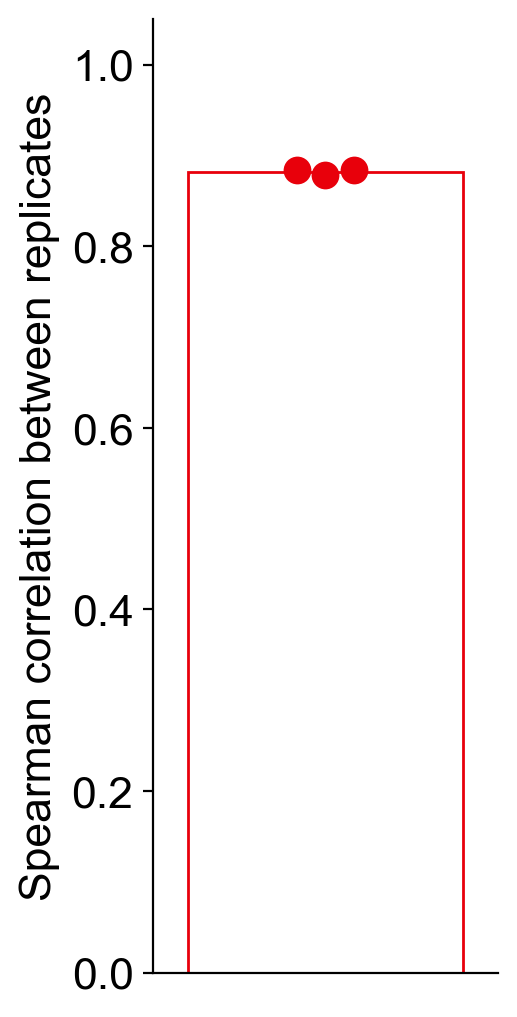

In [30]:
FIGURE_OUTPATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_Dec2021/MS_FIGURES/"

fig = plt.figure(1, (2.5, 5), dpi = 200)
ax = plt.subplot(1, 1, 1)

bar = sns.barplot(y = "rho", data = df_rhos, color = sns.color_palette("bright")[3], estimator = np.mean, errorbar = None,
           linewidth=1, saturation = 1, fill = False)

sns.swarmplot(y = "rho", data = df_rhos, color = sns.color_palette("bright")[3], size=10)
plt.ylabel("Spearman correlation between replicates")

plt.ylim(0, 1.05)

plt.xlabel("")
ax.set_xticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout(pad = 0.25)
plt.savefig(FIGURE_OUTPATH + "PDFs/" + "Pairwise_correlation.pdf", transparent=False)
plt.savefig(FIGURE_OUTPATH + "PNGs/" + "Pairwise_correlation.png", transparent=False)


In [31]:
SOURCE_OUTPATH = "/nfs/nas12.ethz.ch/fs1201/green_groups_let_public/Euler/Vakil/ClickCodeSeq3_Dec2021/MS_SOURCE_DATA/"
df_rhos.to_csv(SOURCE_OUTPATH + "Fig.S3c.csv")
df_rhos

rho   pair
0  0.883523  R2_R1
1  0.883958  R3_R1
2  0.878345  R3_R2

In [32]:
df_rhos["rho"].mean()

0.8819418962663225